Name - Sausamya Mitra

Roll No - M22AI627

Problem 2: Learning to implement Neural Network

Approach  1(using libraries) -Developing the Neural Network model.

In [88]:
#importing the libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load the dataset
train_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
    'C:\\Users\\SAUSAMYA MITRA\\Python_Anaconda_Setup\\IPYNB_code\\Machine_Learning_Question2\\train',
    target_size=(28, 28),
    batch_size=32,
    class_mode='categorical',
    color_mode='grayscale'
)
val_datagen = ImageDataGenerator(rescale=1./255)
val_generator = val_datagen.flow_from_directory(
    'C:\\Users\\SAUSAMYA MITRA\\Python_Anaconda_Setup\\IPYNB_code\\Machine_Learning_Question2\\val',
    target_size=(28, 28),
    batch_size=32,
    class_mode='categorical',
    color_mode='grayscale'
)

# Build the neural network
model = keras.Sequential([
    layers.Flatten(input_shape=(28, 28, 1)),
    layers.Dense(256, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=val_generator
)

# Evaluate the model
test_loss, test_acc = model.evaluate(val_generator)
print('Test accuracy:', test_acc)


Found 1000 images belonging to 10 classes.
Found 178 images belonging to 10 classes.
Epoch 1/10
32/32 [==============================] - 1s 23ms/step - loss: 1.1297 - accuracy: 0.6680 - val_loss: 0.6436 - val_accuracy: 0.7921
Epoch 2/10
32/32 [==============================] - 1s 17ms/step - loss: 0.3025 - accuracy: 0.9110 - val_loss: 0.3672 - val_accuracy: 0.8820
Epoch 3/10
32/32 [==============================] - 1s 19ms/step - loss: 0.1559 - accuracy: 0.9530 - val_loss: 0.2679 - val_accuracy: 0.9270
Epoch 4/10
32/32 [==============================] - 1s 20ms/step - loss: 0.1282 - accuracy: 0.9700 - val_loss: 0.3015 - val_accuracy: 0.8933
Epoch 5/10
32/32 [==============================] - 1s 19ms/step - loss: 0.0709 - accuracy: 0.9830 - val_loss: 0.2792 - val_accuracy: 0.9157
Epoch 6/10
32/32 [==============================] - 1s 20ms/step - loss: 0.0565 - accuracy: 0.9920 - val_loss: 0.2169 - val_accuracy: 0.9270
Epoch 7/10
32/32 [==============================] - 1s 23ms/step - lo

Approach  2(from scratch) - Reading the data manually and developing the Neural Network model

In [89]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import os
import cv2
from keras.layers import Dense, Flatten

In [90]:
# Defining the paths to your image folders
train_path = 'C:\\Users\\SAUSAMYA MITRA\\Python_Anaconda_Setup\\IPYNB_code\\Machine_Learning_Question2\\'
val_path = 'C:\\Users\\SAUSAMYA MITRA\\Python_Anaconda_Setup\\IPYNB_code\\Machine_Learning_Question2\\'

In [91]:
# Set the path to the folder containing the 'train' folder
data_dir = train_path
# Set the image size
img_size = (32, 32)
# Create empty lists for the images and labels
images = []
labels = []
# Loop over each folder from '0' to '9'
for label in range(10):
    folder_path = os.path.join(data_dir, 'train', str(label))
    # Loop over each image in the folder
    for file in os.listdir(folder_path):
        file_path = os.path.join(folder_path, file)
        if file_path.endswith(('.tiff','.bmp')):
            # Load the image and resize it to the desired size
            img = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
            img = cv2.resize(img, img_size)
            # Append the image and label to the lists
            images.append(img)
            labels.append(label)
            
# Convert the lists to NumPy arrays
images = np.array(images)
labels = np.array(labels)
# Save the arrays in NumPy format
np.save('x_train.npy', images)
np.save('y_train.npy', labels)



In [92]:
# Set the path to the folder containing the 'val' folder
data_dir_val = val_path
# Set the image size
img_size_val = (32, 32)
# Create empty lists for the images and labels
images_val = []
labels_val = []
# Loop over each folder from '0' to '9'
for label in range(10):
    folder_path = os.path.join(data_dir_val, 'val', str(label))
    # Loop over each image in the folder
    for file in os.listdir(folder_path):
        file_path = os.path.join(folder_path, file)
        if file_path.endswith(('.tiff','.bmp')):
            # Load the image and resize it to the desired size
            img = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
            img = cv2.resize(img, img_size_val)
            # Append the image and label to the lists
            images_val.append(img)
            labels_val.append(label)
            
# Convert the lists to NumPy arrays
images_val = np.array(images_val)
labels_val = np.array(labels_val)
# Save the arrays in NumPy format
np.save('x_test.npy', images_val)
np.save('y_test.npy', labels_val)

In [93]:
# Load the dataset
x_train = np.load('x_train.npy')
y_train = np.load('y_train.npy')
x_test = np.load('x_test.npy')
y_test = np.load('y_test.npy')

1000
178
(1000, 32, 32)
(178, 32, 32)


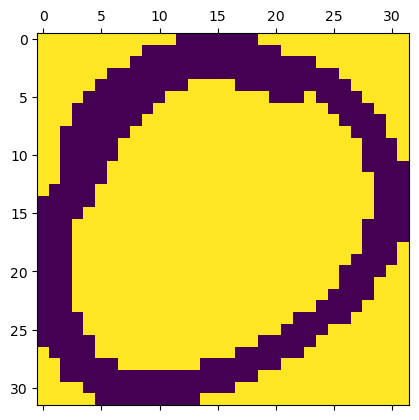

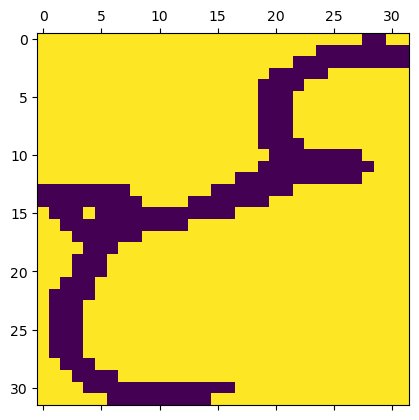

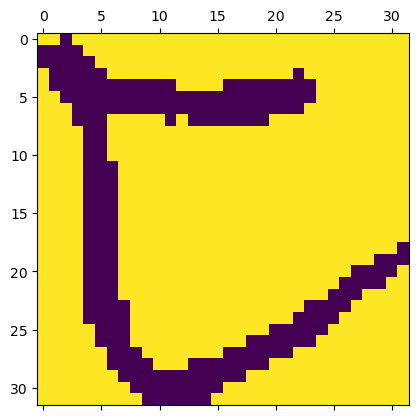

In [94]:
# test the images are loaded correctly
print(len(x_train))
print(len(x_test))
x_train[0].shape
x_train[0]
plt.matshow(x_train[0])
plt.matshow(x_train[999])
print(x_train.shape)
print(x_test.shape)
y_train
y_test
plt.matshow(x_test[150])

Creating a Simple NN

In [95]:
# creating a simple nn
# create a dense layer where every input is connected to every other output, the number of inputs are 1000, outputs are 10
# activation function is sigmoid
model = keras.Sequential([
    keras.layers.Flatten(),
    keras.layers.Dense(10, input_shape=(1024,),activation = 'sigmoid')
    ])

# compiling the nn
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
              )

# training the model
#  10 iterations i have done here
model.fit(x_train, y_train,epochs= 10, validation_data=(x_test, y_test))

Epoch 1/10
32/32 [==============================] - 0s 6ms/step - loss: 153.7285 - accuracy: 0.3800 - val_loss: 71.6850 - val_accuracy: 0.4775
Epoch 2/10
32/32 [==============================] - 0s 3ms/step - loss: 30.9075 - accuracy: 0.7700 - val_loss: 33.6821 - val_accuracy: 0.7022
Epoch 3/10
32/32 [==============================] - 0s 2ms/step - loss: 13.3755 - accuracy: 0.8800 - val_loss: 28.4735 - val_accuracy: 0.7472
Epoch 4/10
32/32 [==============================] - 0s 3ms/step - loss: 8.7493 - accuracy: 0.9210 - val_loss: 25.3301 - val_accuracy: 0.8090
Epoch 5/10
32/32 [==============================] - 0s 3ms/step - loss: 5.8379 - accuracy: 0.9270 - val_loss: 22.0146 - val_accuracy: 0.8034
Epoch 6/10
32/32 [==============================] - 0s 3ms/step - loss: 10.6535 - accuracy: 0.9170 - val_loss: 19.5448 - val_accuracy: 0.8146
Epoch 7/10
32/32 [==============================] - 0s 2ms/step - loss: 5.9838 - accuracy: 0.9290 - val_loss: 9.8395 - val_accuracy: 0.8820
Epoch 8/1

Observation - I can see a better accuracy from the 2nd iteration

In [96]:
# now scaling and trying to check the accuracy, dividing the dataset by 255
x_train_scaled = x_train/255
x_test_scaled = x_test/255
model.fit(x_train_scaled, y_train,epochs= 10, validation_data=(x_test_scaled, y_test))

Epoch 1/10
32/32 [==============================] - 0s 7ms/step - loss: 0.7509 - accuracy: 0.9360 - val_loss: 1.0079 - val_accuracy: 0.7809
Epoch 2/10
32/32 [==============================] - 0s 3ms/step - loss: 0.7547 - accuracy: 0.9160 - val_loss: 0.9756 - val_accuracy: 0.8258
Epoch 3/10
32/32 [==============================] - 0s 3ms/step - loss: 0.7253 - accuracy: 0.9400 - val_loss: 0.9461 - val_accuracy: 0.8483
Epoch 4/10
32/32 [==============================] - 0s 3ms/step - loss: 0.7023 - accuracy: 0.9590 - val_loss: 0.9232 - val_accuracy: 0.8876
Epoch 5/10
32/32 [==============================] - 0s 4ms/step - loss: 0.6842 - accuracy: 0.9690 - val_loss: 0.9071 - val_accuracy: 0.9101
Epoch 6/10
32/32 [==============================] - 0s 4ms/step - loss: 0.6711 - accuracy: 0.9750 - val_loss: 0.8946 - val_accuracy: 0.9213
Epoch 7/10
32/32 [==============================] - 0s 4ms/step - loss: 0.6600 - accuracy: 0.9820 - val_loss: 0.8846 - val_accuracy: 0.9213
Epoch 8/10
32/32 [==

Observation - Now i am getting better result for all iterations on scaling the training dataset

In [97]:
# evaluate test dataset
print("------Evaluating the test datset based on the NN model developed-------")
model.evaluate(x_test_scaled,y_test)

------Evaluating the test datset based on the NN model developed-------
6/6 [==============================] - 0s 2ms/step - loss: 0.8618 - accuracy: 0.9326


[0.861791729927063, 0.932584285736084]

Observation - I can see the result is almost same as the training dataset

6/6 [==============================] - 0s 3ms/step
Predicted Value is  0
Predicted Value is  5
Predicted Value is  9


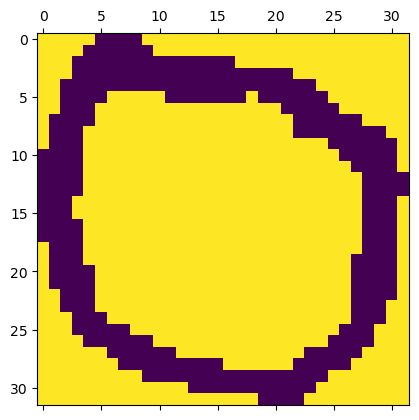

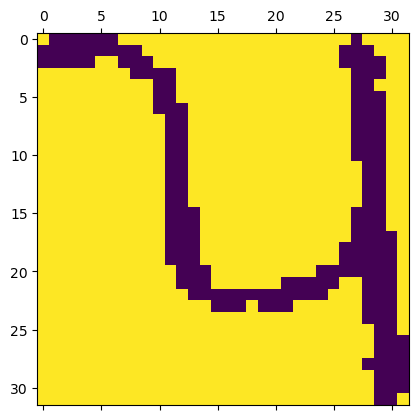

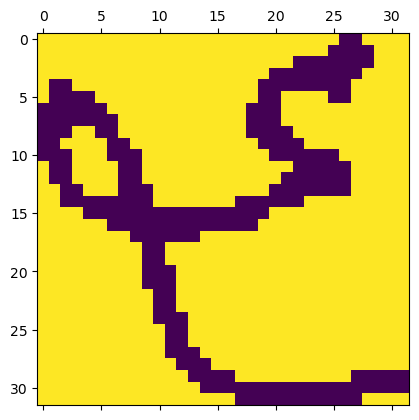

In [98]:
# predicting the 1st image
plt.matshow(x_test[0])
y_predicted = model.predict(x_test_scaled)
y_predicted[0]
# as this is showing the 10 results for the input '0', we need to look for the value which is max
print('Predicted Value is ',np.argmax(y_predicted[0]))
# testing for some more values
plt.matshow(x_test[88])
print('Predicted Value is ',np.argmax(y_predicted[88]))
plt.matshow(x_test[177])
print('Predicted Value is ',np.argmax(y_predicted[177]))

In [99]:
# some predictions may not be right
# so i am building a confusion matrix to see how our prediction looks like
# converting to concrete values
#confusion matrix
y_predicted_labels=[np.argmax(i) for i in y_predicted]
print(y_predicted_labels, len(y_predicted_labels))
conf_mat = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)
conf_mat

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 7, 7, 1, 1, 1, 7, 7, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 9, 4, 3, 2, 5, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 0, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 1, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9] 178


<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[18,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 12,  0,  0,  0,  0,  0,  4,  0,  0],
       [ 0,  0, 13,  1,  1,  1,  0,  0,  0,  1],
       [ 0,  0,  2, 15,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 18,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 18,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0, 17,  0,  0,  0],
       [ 0,  1,  0,  0,  0,  0,  0, 17,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 18,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 20]])>

Text(95.72222222222221, 0.5, 'Actual')

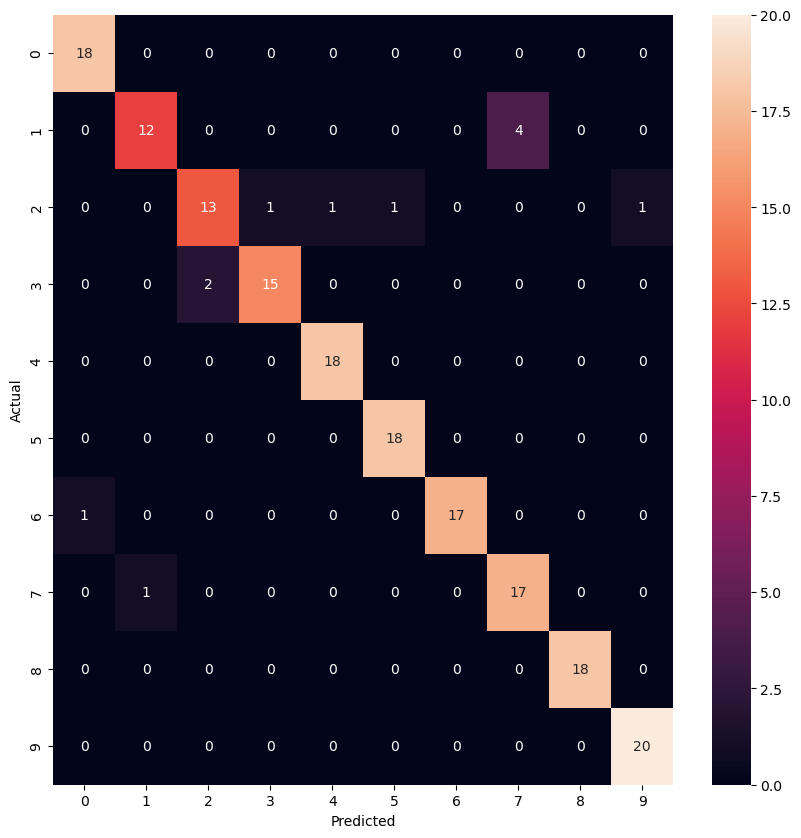

In [100]:
#importing seaborn library for plotting the confusion matrix in a colored form for better understanding
import seaborn as sn
plt.figure(figsize = (10,10))
sn.heatmap(conf_mat,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')

Observation - here i can see there are some errors so, 
i am modifying my nn, i am adding some layers in the above model and different activation functions

Updating the previous NN model for better results

In [101]:
# in 1st Dense layer,i have given the input as 32 x 32 = 1024 neurons, which will give 10 output(numbers from 0 to 9)
# in 2nd Dense layer,i have given the input as 10 neurons from above layers output
# adding more layers for better accuracy
model2 = keras.Sequential([
    keras.layers.Flatten(),
    keras.layers.Dense(1024,input_shape=(1024,), activation='relu'),
    keras.layers.Dense(10, activation='softmax')
    
    ])

# compiling the nn
model2.compile(optimizer='adam',
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy']
               )
# training the model
# 10 iterations are done here
history = model2.fit(x_train_scaled, y_train,epochs= 10, validation_data=(x_test_scaled, y_test))



Epoch 1/10
32/32 [==============================] - 1s 24ms/step - loss: 1.2099 - accuracy: 0.6610 - val_loss: 0.3548 - val_accuracy: 0.9045
Epoch 2/10
32/32 [==============================] - 1s 21ms/step - loss: 0.2074 - accuracy: 0.9430 - val_loss: 0.2884 - val_accuracy: 0.9270
Epoch 3/10
32/32 [==============================] - 1s 21ms/step - loss: 0.1066 - accuracy: 0.9640 - val_loss: 0.2140 - val_accuracy: 0.9551
Epoch 4/10
32/32 [==============================] - 1s 25ms/step - loss: 0.0618 - accuracy: 0.9850 - val_loss: 0.2155 - val_accuracy: 0.9551
Epoch 5/10
32/32 [==============================] - 1s 21ms/step - loss: 0.0669 - accuracy: 0.9850 - val_loss: 0.2663 - val_accuracy: 0.9326
Epoch 6/10
32/32 [==============================] - 1s 21ms/step - loss: 0.0343 - accuracy: 0.9920 - val_loss: 0.2008 - val_accuracy: 0.9494
Epoch 7/10
32/32 [==============================] - 1s 20ms/step - loss: 0.0246 - accuracy: 0.9970 - val_loss: 0.1810 - val_accuracy: 0.9551
Epoch 8/10
32

Observation - Due to multiple layers the compiling will take some time to execute,
I also got a amazing accuracy than the  earlier model

In [102]:
# evaluating test dataset on modified model
model2.evaluate(x_test_scaled,y_test)

6/6 [==============================] - 0s 3ms/step - loss: 0.1829 - accuracy: 0.9494


[0.18293626606464386, 0.949438214302063]

Observation - Earlier i got an accuracy of 91% now i am an acuuracy of get 94% which is very good

In [103]:
# again doing the confusion matrix
# build confusion matrix to see how our prediction looks like now with the updated model
# converting to concrete values
y_predicted = model2.predict(x_test_scaled)
y_predicted[0]
y_predicted_labels=[np.argmax(i) for i in y_predicted]
print(y_predicted_labels, len(y_predicted_labels))
confu_mat = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)
confu_mat

6/6 [==============================] - 0s 4ms/step
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 8, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 7, 1, 1, 1, 7, 7, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 9, 4, 2, 2, 5, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 1, 7, 7, 7, 7, 7, 7, 7, 7, 7, 1, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9] 178


<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[17,  0,  0,  0,  0,  0,  0,  0,  1,  0],
       [ 0, 13,  0,  0,  0,  0,  0,  3,  0,  0],
       [ 0,  0, 14,  0,  1,  1,  0,  0,  0,  1],
       [ 0,  0,  0, 17,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 18,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 18,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 18,  0,  0,  0],
       [ 0,  2,  0,  0,  0,  0,  0, 16,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 18,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 20]])>

Text(95.72222222222221, 0.5, 'Actual')

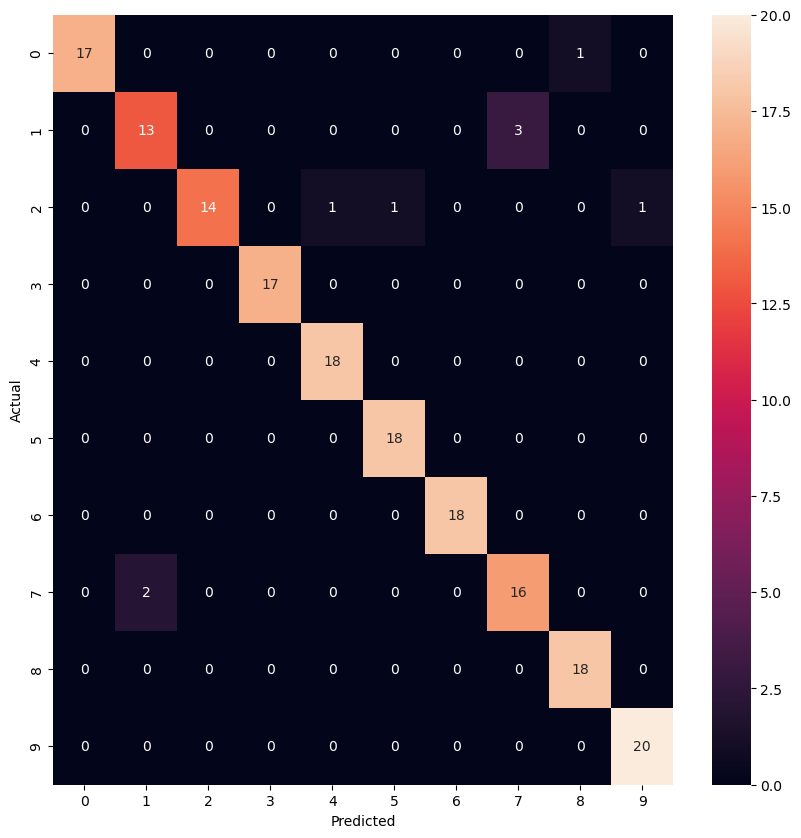

In [104]:
#importing seaborn library for plotting the confusion matrix in a colored form for better understanding
plt.figure(figsize = (10,10))
sn.heatmap(confu_mat,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')

Observation - I can see in the updated model, there are less number of errors,
as we know whatever is not in diagonal is an error

6/6 [==============================] - 0s 2ms/step - loss: 9.1132 - accuracy: 0.9213
------Evaluating the test datset based on the updated NN model developed-------
Test accuracy: 0.9213483333587646


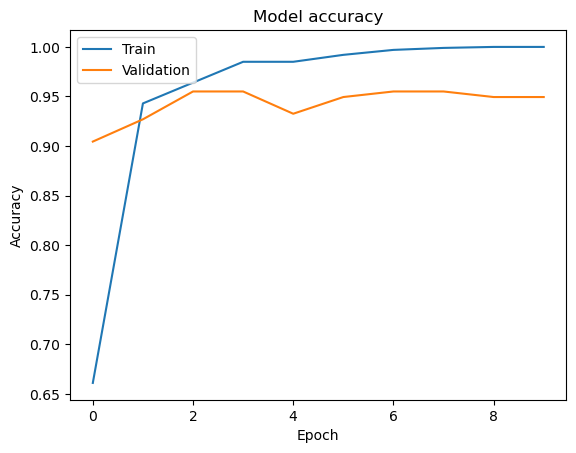

In [105]:
# Evaluating the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print("------Evaluating the test datset based on the updated NN model developed-------")
print('Test accuracy:', test_acc)
# Plot the training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()